In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes
import SlantStack

In [2]:
import importlib

importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

<module 'SlantStack' from '/home/susanne/SeismicDiffractions/SlantStack.py'>

In [3]:
#Reproduzindo a figura do Tabti

****

### Criando o Modelo 

****

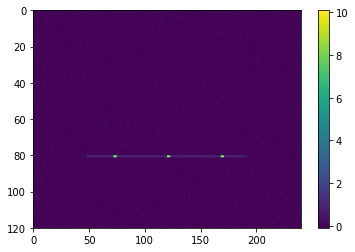

In [4]:
dx=1.0 #(m) Discretização em X
dz=1.0 #(m) Discretização em Y
nz=120 #Tamanho do Grid em Z
ntr=nx=240 #Tamanho do Grid em X
c=250 #m/s

MOD = np.zeros([ntr,nz])

#Barra
x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

#Pontos Difratores
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/3))
    MOD[i,z]=1
MOD[int(np.round(1.5*nx/5)):int(np.round(1.5*nx/5+3)),z]=10
MOD[int(np.round(2.5*nx/5)):int(np.round(2.5*nx/5+3)),z]=10
MOD[int(np.round(3.5*nx/5)):int(np.round(3.5*nx/5+3)),z]=10

#Adicionando ruído no modelo
nn = np.random.rand(ntr,nz)
MOD = MOD+(nn-0.5)*0.2

R = MOD.T

plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.colorbar()
plt.show()

(120, 240)


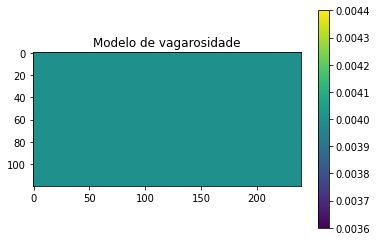

In [6]:
SW=np.ones([nz,ntr])*1/c
print(SW.shape)

plt.imshow(SW)
plt.colorbar()
plt.title('Modelo de vagarosidade')
plt.show()

*****

## Traçador de Raios

*******

In [7]:
## Essa linha só precisa ser rodada uma vez, quando mudamos o modelo de vagarosidade (SW)

#Armazenamos a TT no file.npy, acessado na próxima célula.

# Checar porquê TT[:,k,:] não é  simétrica (princípio da reciprocidade)

#TT=MigPreFuncoes.raymodel3(SW,dx,nx,"CSGhomo/raiosHomoBarra.npy")

TTh.shape=(240, 120, 240)


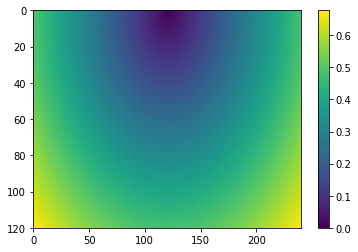

TSX.shape=(120, 240)


In [8]:
with open('Data/time_table_barra.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

dt=0.004

TSX = (TTh[120,:,:])  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

timer=np.round(TTh/dt)+1

print(f"TSX.shape={TSX.shape}")

In [9]:
dt=0.004
print(1/2/dt)

125.0


******

## Criando o Dado Sintético

******

2.146625258399798


Text(0.5, 0, 's')

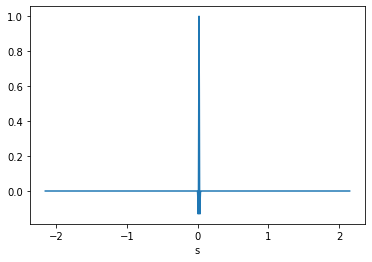

In [12]:
#Wavelet

fr=40 #Hz
nps=200 #era 200, mudei pra 136 e funcionou, 
#       #tenho que conferir se posso fazer isso mesmo...
dt=.004 #s
rick=MigPreFuncoes.ricker(nps,fr,dt)

#sx=10  #index position
#sz=0  #index position

# Tempo de ida e volta até o fundo do modelo
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
print(tmax)
#nd2=nt+1; 



W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1]


plt.plot(np.arange(-nt*dt,nt*dt,dt),W)
plt.xlabel('s')

In [13]:
#Creating the synthetic csg

dsx = 1
nsx = nx
ngx = nx
path = "Data/CSG_diffbar/barra_gather_shot"
files = []

for i in range(240):
    filename = 'Data/CSG_diffbar/barra_gather_shot_{}'.format(i)
    #print(i,filename)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)
        
len(files)
#files = MigPreFuncoes.kirchoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,path)

240

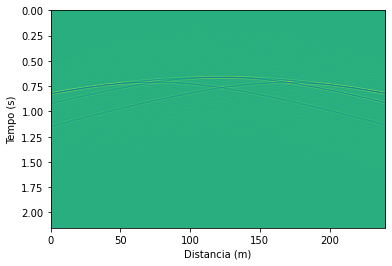

538


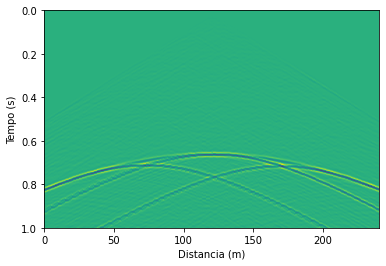

In [14]:
plt.imshow(files[120],aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
#plt.ylim([0.4,0])
plt.show()

shot = 120
filename = 'Data/CSG_diffbar/barra_gather_shotCenter{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1t = np.load(file)

#nt=500
print(nt)
gather1=gather1t[0:nt,:]
win=20*dt
dwin=dt
app=15
isx=shot


plt.imshow(gather1,aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.ylim([1,0])
plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
plt.show()

#Transformar em célula de código se não tiver o aruivo salvo localmente

pmin = -1
pmax = 1
dp = 0.1
xwin=zwin=30
dx=dz=1
x_ini=z_ini=0

pm,sm = SlantStack.local_window(MOD.T,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

with open("Data/CSG_diffbar/barra_dipfield", "wb") as f:
    np.save(f,pm)
    
with open("Data/CSG_diffbar/barra_semblance", "wb") as f: 
    np.save(f,sm)

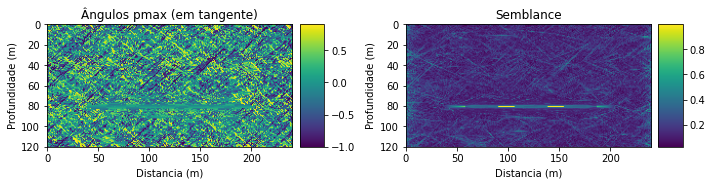

In [15]:
with open("Data/CSG_diffbar/barra_dipfield", "rb") as f:
    pm = np.load(f)
    
with open("Data/CSG_diffbar/barra_semblance", "rb") as f: 
    sm = np.load(f)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121)
ax1.set_title("Ângulos pmax (em tangente)")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(pm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Semblance")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(sm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

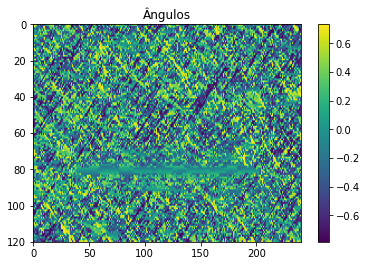

In [16]:
m_theta = np.arctan(pm)
plt.imshow(m_theta,extent=[0, ntr*dx, nz*dz, 0], aspect="auto")
plt.title("Ângulos")
plt.colorbar()
plt.show()

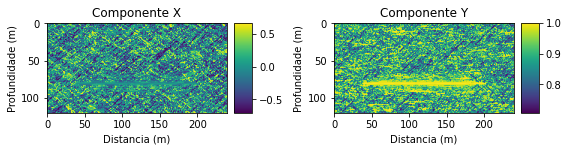

In [17]:
X = np.sin(m_theta)
Y = np.cos(m_theta)

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(121)
ax1.set_title("Componente X")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(X)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Componente Y")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(Y)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

120


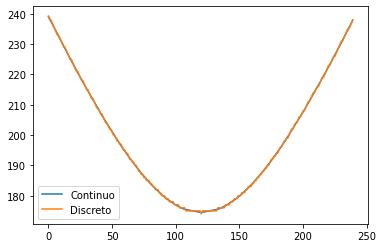

In [21]:
isx=shot #shot coordinate
print(isx)
profile=int(np.round(1.5*nx/5))
tsx = TTh[isx,0:nz,profile] # é um vetor 1xnz, tempos de cada ponto no perfil chegar até isx
ttsx = np.tile(tsx,[nx,1]) # repete o vetor nx vezes, resulta matriz nx x nz
tgx = TTh[isx,0:nz,0:nx] # tempo de cada ponto no perfil chegar até  cada um dos receptores
t = ttsx.T + tgx #tempo de transito de isx, até ponto no perfil, até um receptor
t_disc = np.round(t/dt)+1
trace1=gather1.T[np.ix_([isx],t_disc.flatten().astype(np.int32))]
trace1 = trace1.reshape([nz,nx]) #seção? imshow em um separado

plt.plot(t[z,:]/dt + 1,label='Continuo')
plt.plot(t_disc[z,:],label='Discreto') #tempo de trânsito isx-(profile,z)-igx (no perfil) 
plt.legend()

120 80


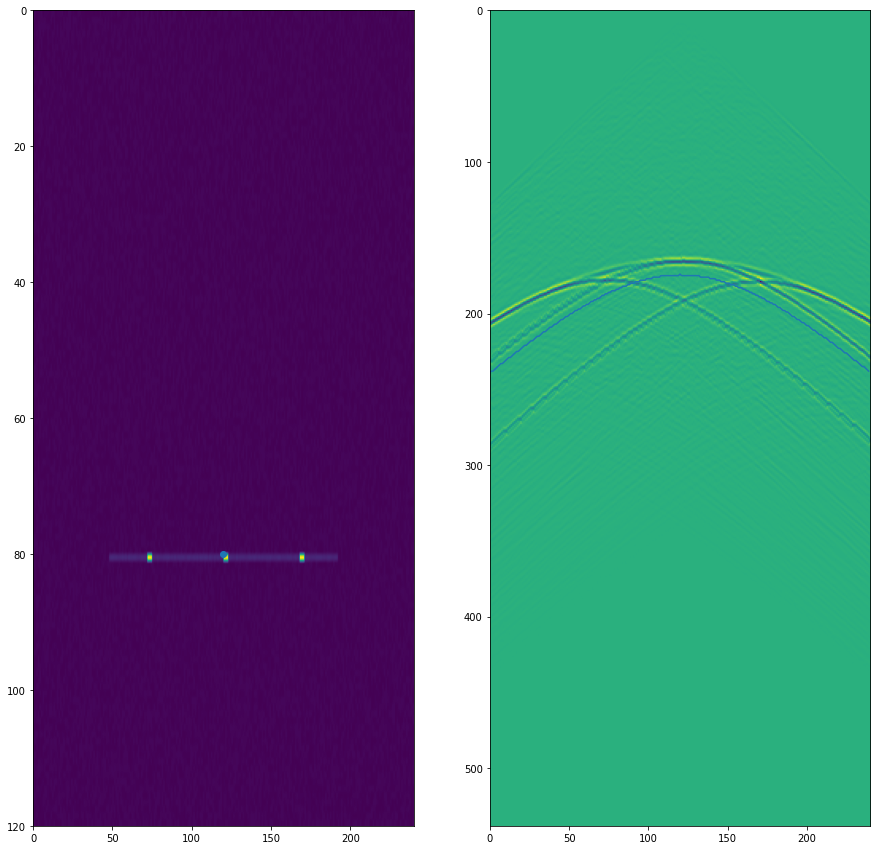

In [26]:
#Check diffraction time curve
print(isx,z)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 15))

ax1.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
ax1.plot(isx,z,'o')
ax2.imshow(gather1, aspect='auto',extent=[0, ntr,nt, 0])
#plt.plot(np.linspace(0,dx*ntr,ntr),t[z,:])
x= np.arange(0,ntr,1).astype(np.int32)
#plt.plot(np.tile(isx,ntr),t_disc[z,:])
ax2.plot(x,t_disc[z,:])


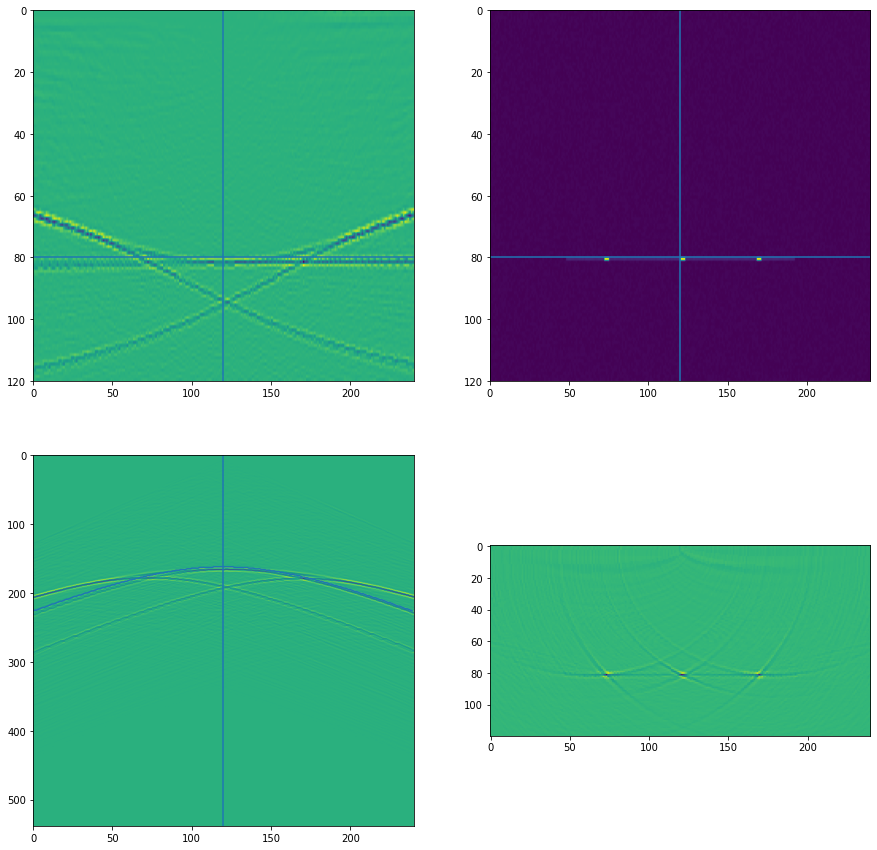

In [27]:
mig=np.zeros([nz,nx])
tabti=np.zeros([nz,ntr])
tabti2=np.zeros([nz,ntr])
tabti3=np.zeros([nz,ntr])

#profile=int(np.round(nx/2))
#profile=int(np.round(1.5*nx/5))
profile=int(np.round(2.5*nx/5))
#profile=int(np.round(3.5*nx/5))
z = int(np.round(nz*2/3))
tempo_d=np.zeros([nz,ntr])
for igx in range(0,ntr):
        w = MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)
        t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
        t2 = (t<nt)*t
        trace1=gather1.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
        trace1 = trace1.reshape([nz,nx])
        trace2 = trace1*w
        trace3 = trace1*(1-w)
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace1
        tabti[0:nz,igx]=trace1[0:nz,profile]
        tabti2[0:nz,igx]=trace2[0:nz,profile]
        tabti3[0:nz,igx]=trace3[0:nz,profile]
        tempo_d[0:nz,igx]=t2[0:nz,profile]

        
zz=z

fig, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2,figsize=(15, 15))

#fig.suptitle('Horizontally stacked subplots')
ax1.imshow(tabti,extent=[0, nx, nz, 0], aspect='auto')
ax1.axvline(x=profile)
#for iz in range(0,nz,10):
ax1.axhline(y=zz)


ax2.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
ax2.axvline(x=profile*dx)
ax2.axhline(y=zz*dz)

ax3.imshow(gather1, aspect='auto',extent=[0, ntr,nt, 0])
ax3.axvline(x=profile)



x= np.arange(0,ntr,1).astype(np.int32)
#plt.plot(np.tile(isx,ntr),t_disc[z,:])
#for iz in range(0,nz,10):
ax3.plot(x,tempo_d[zz,0:ntr])
    
ax4.imshow(mig)




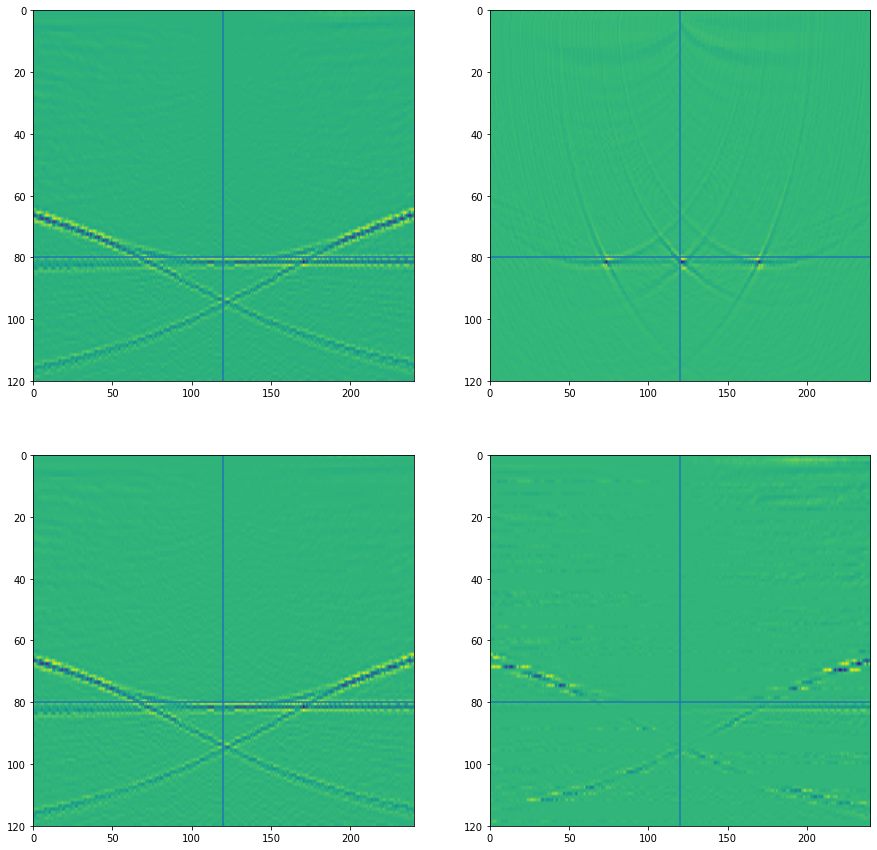

In [31]:
fig, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2,figsize=(15, 15))

#fig.suptitle('Horizontally stacked subplots')
ax1.imshow(tabti,extent=[0, nx, nz, 0], aspect='auto')
ax1.axvline(x=profile)
#for iz in range(0,nz,10):
ax1.axhline(y=zz)


ax2.imshow(mig,extent=[0, nx, nz, 0], aspect='auto')
ax2.axvline(x=profile*dx)
ax2.axhline(y=zz*dz)

ax3.imshow(tabti2,extent=[0, nx, nz, 0], aspect='auto')
ax3.axvline(x=profile)
#for iz in range(0,nz,10):
ax3.axhline(y=zz)

ax4.imshow(tabti3,extent=[0, nx, nz, 0], aspect='auto')
ax4.axvline(x=profile)
#for iz in range(0,nz,10):
ax4.axhline(y=zz)



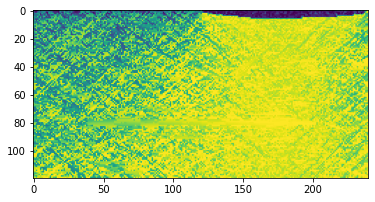

In [86]:
plt.imshow(w)

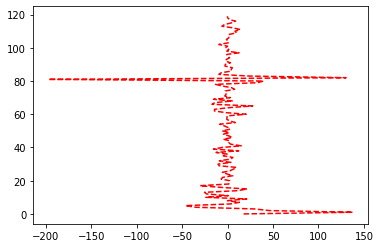

In [36]:
trace_tabti = np.sum(tabti,axis=1)
trace_tabti2 = np.sum(tabti2,axis=1)

trace_tabti3 = np.sum(tabti3,axis=1)

trace_mig=mig[:,profile]

#plt.imshow(mig)
plt.plot(trace_tabti,np.arange(0,nz),'k')
plt.plot(trace_tabti2,np.arange(0,nz),'--b')
plt.plot(trace_tabti3,np.arange(0,nz),'--r')


plt.plot(trace_mig,np.arange(0,nz))


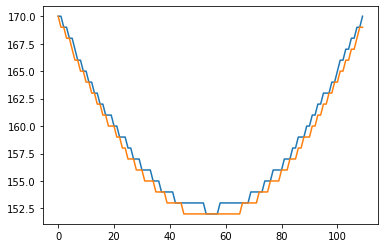

In [25]:
plt.plot(tempo_d)
plt.plot(t_disc[z,:],label='Discreto')


(100, 110)


[]

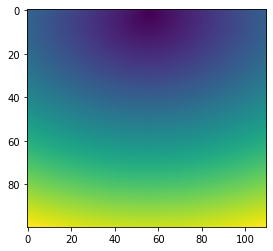

In [51]:
trace1 = trace1.reshape([nz,nx])

print(np.shape(trace1))
plt.imshow(t)
plt.plot()

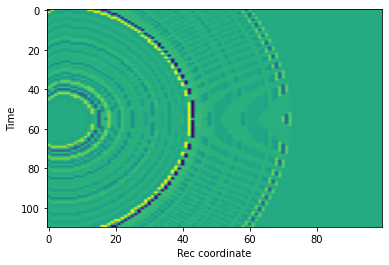

In [52]:
plt.imshow(trace1.T,aspect="auto")
plt.xlabel('Rec coordinate')
plt.ylabel('Time')
plt.show()